PCA: using sk-learn and my own implementation with numpy

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
iris = datasets.load_iris()

In [3]:
data = iris.data
targets = iris.target
feat_names = iris.feature_names
classes = iris.target_names

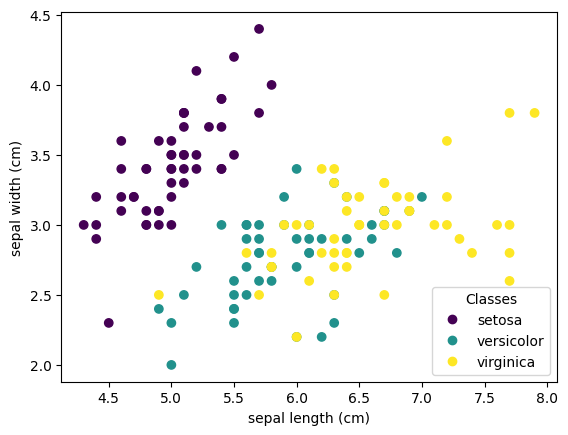

In [4]:
scatter = plt.scatter(data[:, 0], data[:, 1], c=targets)
plt.xlabel(feat_names[0])
plt.ylabel(feat_names[1])
plt.legend(scatter.legend_elements()[0], classes, loc="lower right", title="Classes")

In [5]:
# PCA on iris dataset of 4 features, projected down to 3 PC axes
pca_data = PCA(n_components=3).fit_transform(data)

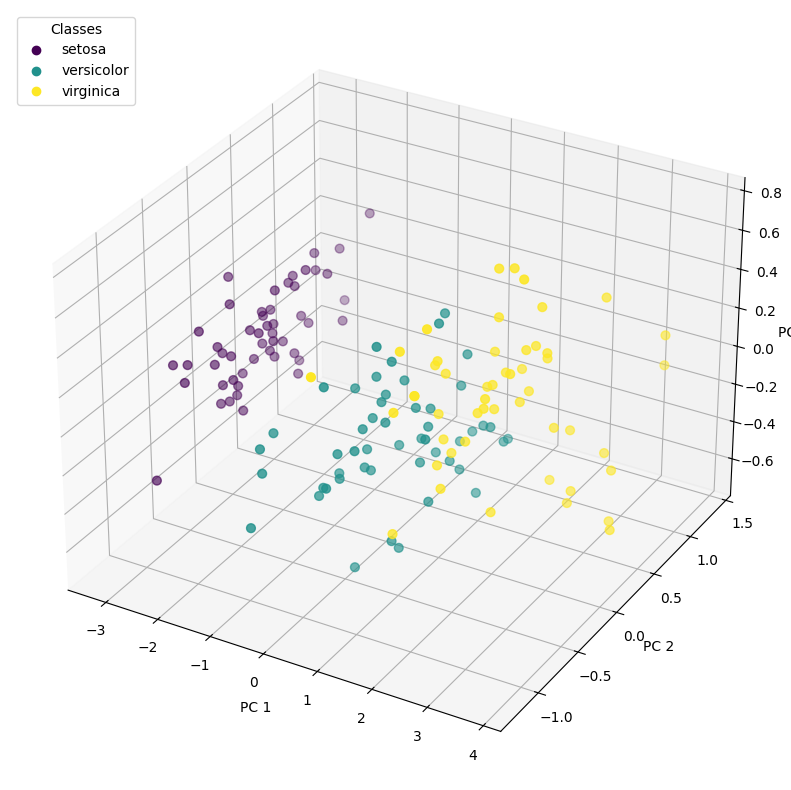

In [6]:
# %matplotlib
# plt.ion()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=targets, s=40)
plt.legend(scatter.legend_elements()[0], classes, loc="upper left", title="Classes")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3');

Text(0, 0.5, 'pc 2')

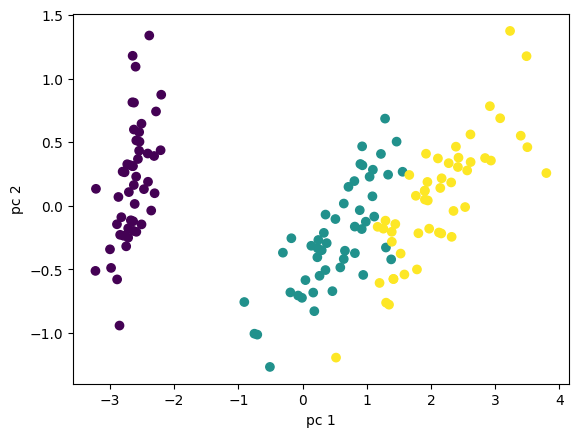

In [7]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=targets)
plt.xlabel('pc 1')
plt.ylabel('pc 2')

Text(0, 0.5, 'pc 2')

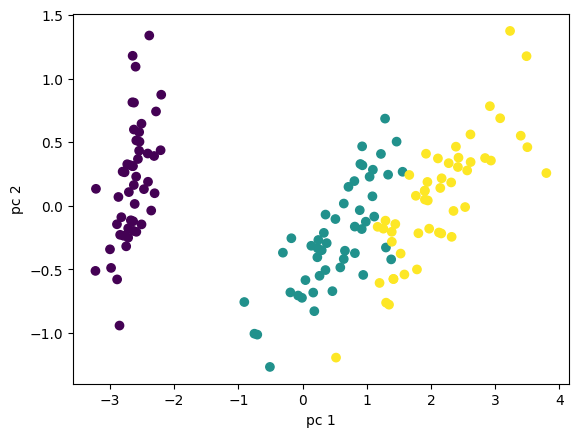

In [7]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=targets)
plt.xlabel('pc 1')
plt.ylabel('pc 2')

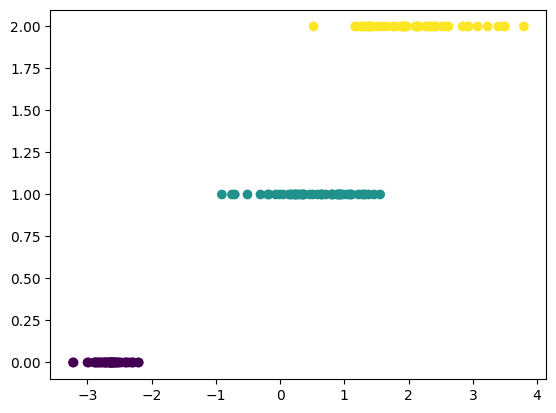

In [8]:
plt.scatter(pca_data[:, 0], targets, c=targets)

In [14]:
# steps to doing PCA from scratch:
# 1. subtract mean from each data dim
# 2. calc covariance mtx
# 3. calc evects and evals of cov mtx
# 4. choose top n dims, concat evect in col form to get feat vect, 
# feat_vect.T @ mean_adj_data.T (col = sample, row = dim)

data_means = np.mean(data, axis=0)
data.shape, data_means.shape

((150, 4), (4,))

In [19]:
data_adj = data - data_means
data_adj.shape

(150, 4)

In [20]:
cov = np.cov(data_adj.T)
cov

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [23]:
evals, evects = np.linalg.eigh(cov)

In [25]:
U, S, Vh = np.linalg.svd(cov)
V = Vh.T

In [27]:
V[:, 0], evects[:, 0]

(array([-0.36138659,  0.08452251, -0.85667061, -0.3582892 ]),
 array([ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]))

In [43]:
trans_data = evects @ data_adj.T

Text(0, 0.5, 'pc 2')

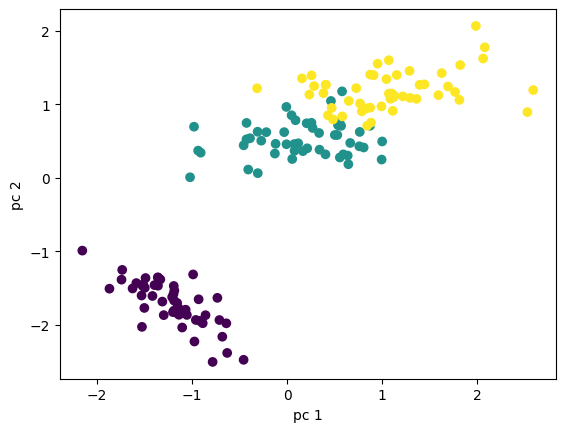

In [44]:
plt.scatter(trans_data.T[:, 0], trans_data.T[:, 1], c=targets)
plt.xlabel('pc 1')
plt.ylabel('pc 2')

Text(0, 0.5, 'pc 2')

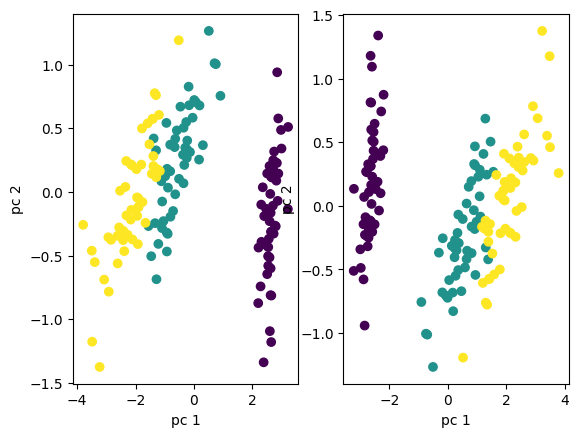

In [42]:
fig, ax = plt.subplots(1, 2)

ax[0].scatter((V.T @ data_adj.T).T[:, 0], (V.T @ data_adj.T).T[:, 1], c=targets)
ax[0].set_xlabel('pc 1')
ax[0].set_ylabel('pc 2')

ax[1].scatter(pca_data[:, 0], pca_data[:, 1], c=targets)
ax[1].set_xlabel('pc 1')
ax[1].set_ylabel('pc 2')

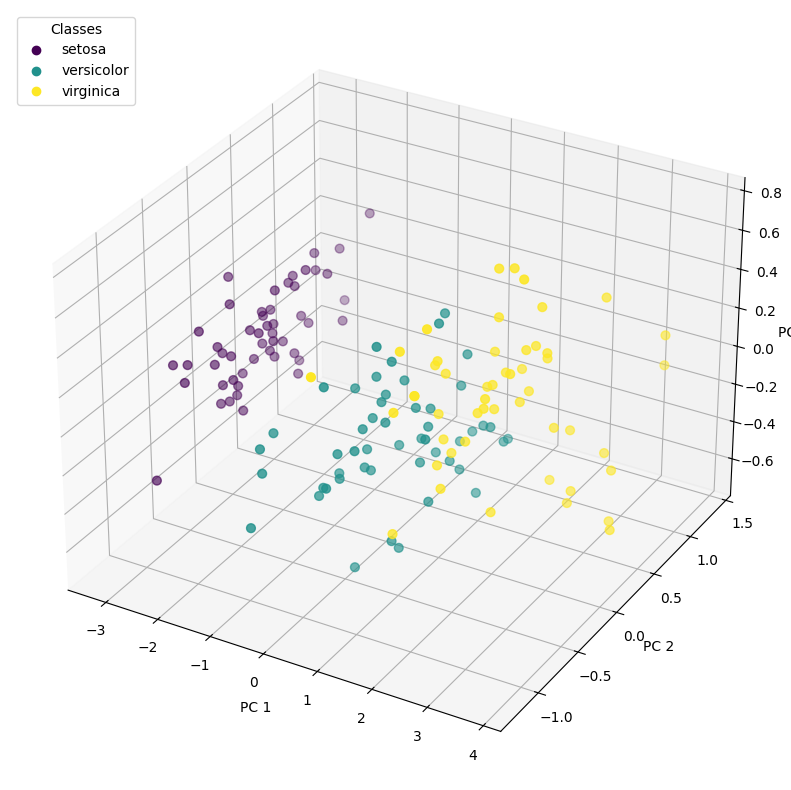

In [46]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=targets, s=40)
plt.legend(scatter.legend_elements()[0], classes, loc="upper left", title="Classes")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3');

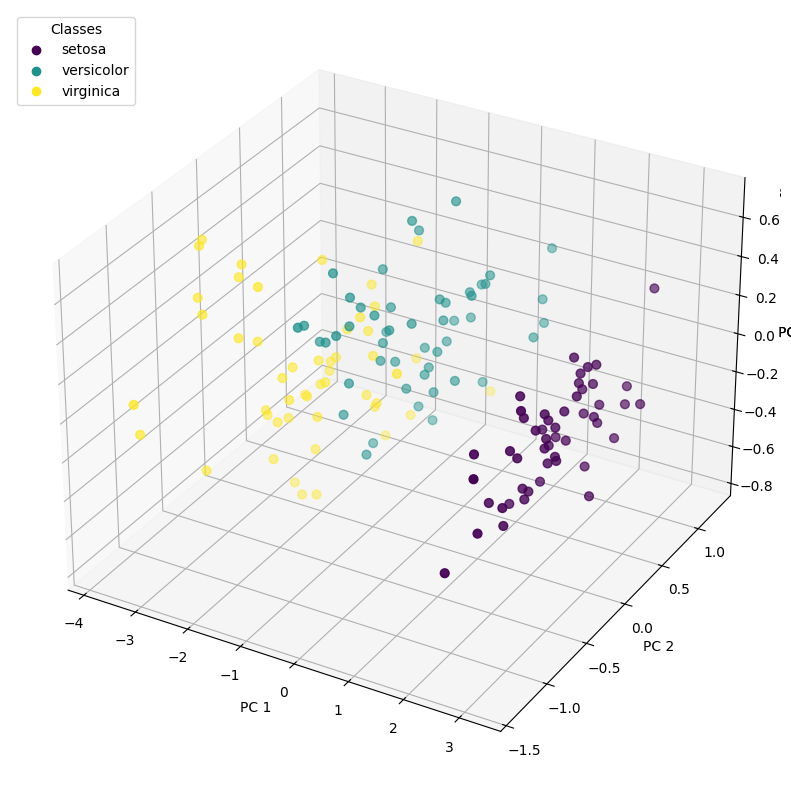

In [ ]:
new_pca = (V.T @ data_adj.T).T
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(new_pca[:, 0], new_pca[:, 1], new_pca[:, 2],c=targets, s=40)
plt.legend(scatter.legend_elements()[0], classes, loc="upper left", title="Classes")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3');